In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/Housing.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df=pd.read_csv('/kaggle/input/housing/Housing.csv')

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Exploration and Cleaning

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No missing values to handle

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In order to implement regression we need to convert object data type into numeric(int64/float64).

In [9]:
oe=OrdinalEncoder()
l=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']
for i in l:
    oe.fit(asarray(df[i]).reshape(-1,1))
    df[i]=oe.transform(asarray(df[i]).reshape(-1,1))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 55.5 KB


In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,2.0
541,1767150,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,1750000,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,2.0
543,1750000,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


# Feature Selection

In [12]:
corr_matrix=df.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [13]:
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64

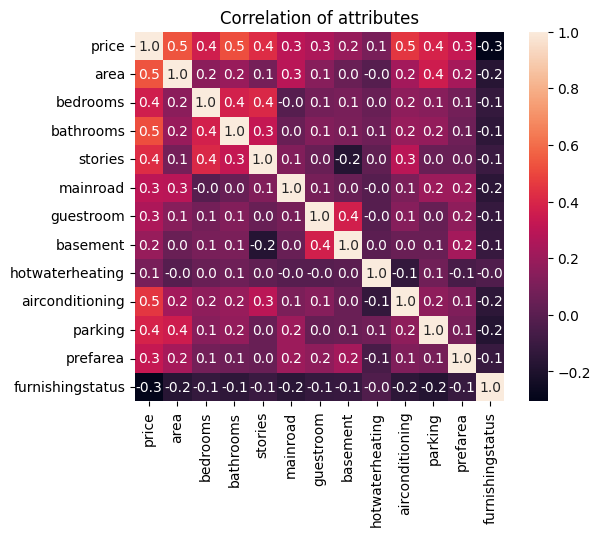

In [14]:
plt.title("Correlation of attributes")
a=sns.heatmap(corr_matrix,square=True, annot=True, fmt=".1f", linecolor='white')

In [15]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [16]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,2.0
541,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,2.0
543,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [17]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

# Spliting data for training and testing

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(381, 12) (164, 12) (381,) (164,)


# Model Training

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
yhat=model.predict(xtest)

In [20]:
yhat

array([ 2702410.15229689,  3695854.83891825,  5982928.90643947,
        3849622.96031104,  6577424.27942361,  6942792.0206936 ,
        3613197.26429001,  3132304.09319921,  5388596.85044232,
        3164667.47369529,  5049051.75477786,  2199488.50364451,
        4219668.55289418,  4542712.11927192,  6729357.63055869,
        2687702.03178332,  7339582.23136245,  6358881.79610238,
        5139522.31850371,  4309297.83430755,  2624652.0585695 ,
        2023396.2986943 ,  5839227.33101739,  5418125.61030146,
        6753758.09892638,  6100162.54389682,  3676404.43273967,
        3734109.77975708,  3623128.08654447,  3785902.00975955,
        4455888.49095388,  5017126.87408339,  5545504.52295889,
        5531315.20489811,  7496365.28201806,  5117086.89560122,
        6672751.46490915,  2381679.84884597,  5305624.34592427,
        5494095.82596319,  4990323.49274269,  5265040.94515175,
        2946623.78627304,  6470284.76966086,  5812675.93623503,
        7879075.85666001,  8334082.21075

In [21]:
model.coef_

array([ 2.42885800e+02,  1.74341774e+05,  8.43475418e+05,  4.46379487e+05,
        4.26377984e+05,  2.14059104e+05,  4.57947518e+05,  8.55201060e+05,
        9.44533677e+05,  3.20595331e+05,  7.03963498e+05, -2.04644784e+05])

In [22]:
model.intercept_

87349.73469970096

In [23]:
model.score(xtest,ytest)

0.7423841080454427

# Model Evaluation

In [24]:
from sklearn.metrics import r2_score
r2=r2_score(ytest,yhat)
print(r2)

0.7423841080454427


# Visualization

<Axes: xlabel='price', ylabel='Density'>

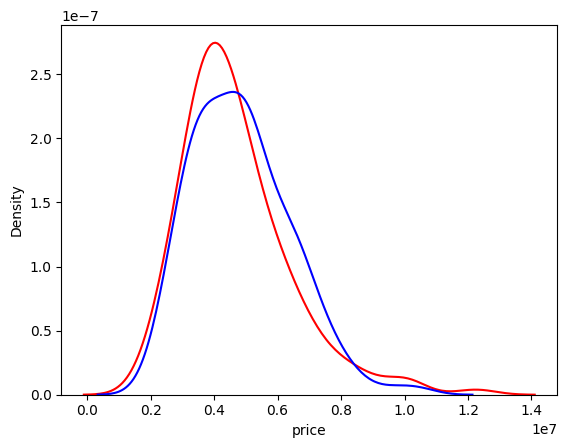

In [25]:
import seaborn as sns
ax1=sns.distplot(ytest,hist=False,color='red',label='Actual')
sns.distplot(yhat,hist=False,color='b',label='Predicted',ax=ax1)

# Model using minmax scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(xtrain)
xtrain.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,5064.372703,2.984252,1.301837,1.821522,0.868766,0.167979,0.338583,0.065617,0.309711,0.650919,0.217848,1.070866
std,2044.695057,0.750273,0.503380,0.873383,0.338100,0.374339,0.473850,0.247937,0.462983,0.834412,0.413326,0.766205
min,1700.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6240.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,15600.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [27]:
xtrain_minmax=minmax.transform(xtrain)
type(xtrain_minmax)

numpy.ndarray

In [28]:
xtrain_minmax=pd.DataFrame(xtrain_minmax,columns=xtrain.columns)
xtrain_minmax.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.242041,0.396850,0.150919,0.273841,0.868766,0.167979,0.338583,0.065617,0.309711,0.216973,0.217848,0.535433
std,0.147100,0.150055,0.251690,0.291128,0.338100,0.374339,0.473850,0.247937,0.462983,0.278137,0.413326,0.383102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136691,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.201439,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.326619,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
xtest_minmax=minmax.transform(xtest)
xtest_minmax=pd.DataFrame(xtest_minmax,columns=[xtest.columns])
xtest_minmax.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,164.000000,164.000000,164.000,164.000000,164.000000,164.00000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000
mean,0.262642,0.384146,0.125,0.256098,0.835366,0.20122,0.378049,0.0,0.329268,0.264228,0.274390,0.533537
std,0.174945,0.141828,0.250,0.285045,0.371986,0.40214,0.486385,0.0,0.471387,0.305540,0.447573,0.376173
min,-0.003597,0.200000,0.000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.135252,0.200000,0.000,0.000000,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.375000
50%,0.223561,0.400000,0.000,0.333333,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000
75%,0.352518,0.400000,0.000,0.333333,1.000000,0.00000,1.000000,0.0,1.000000,0.666667,1.000000,1.000000
max,1.043165,0.800000,1.500,1.000000,1.000000,1.00000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [30]:
xtrain_minmax

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.582734,0.6,0.5,0.333333,1.0,1.0,0.0,0.0,0.0,0.666667,0.0,0.5
1,0.348201,0.6,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.0
2,0.130935,0.2,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0
3,0.471223,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.106475,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.136691,0.2,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
377,0.188489,0.4,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.0
378,0.009784,0.2,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.5
379,1.000000,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.5


In [31]:
xtest_minmax

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.104317,0.4,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
1,0.168345,0.2,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.5
2,0.201439,0.6,0.5,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0
3,0.266187,0.6,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
4,0.309353,0.6,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.309353,0.4,0.5,1.000000,1.0,1.0,1.0,0.0,1.0,0.000000,1.0,0.5
160,0.123741,0.6,0.5,0.333333,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.5
161,0.034173,0.4,0.0,0.333333,0.0,1.0,1.0,0.0,1.0,0.000000,0.0,1.0
162,0.249640,0.4,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.5


In [32]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xtrain_minmax,ytrain)
yhat1=model1.predict(xtest_minmax)

In [33]:
from sklearn.metrics import r2_score
print(r2_score(ytest,yhat1))


0.7423841080454435


# Model using standard scaler

In [34]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
standard.fit(xtrain)
xtrain.describe()



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,5064.372703,2.984252,1.301837,1.821522,0.868766,0.167979,0.338583,0.065617,0.309711,0.650919,0.217848,1.070866
std,2044.695057,0.750273,0.503380,0.873383,0.338100,0.374339,0.473850,0.247937,0.462983,0.834412,0.413326,0.766205
min,1700.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6240.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,15600.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [35]:
xtrain_standard=standard.transform(xtrain)
type(xtrain_standard)

numpy.ndarray

In [36]:
xtrain_standard=pd.DataFrame(xtrain_standard,columns=xtrain.columns)
xtrain_standard.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02
mean,-1.864942e-16,-6.527295e-17,1.049030e-16,3.496765e-17,4.895472e-17,4.895472e-17,-7.692884e-17,-3.496765e-17,-5.128589e-17,3.963001e-17,-1.025718e-16,-1.200556e-16
std,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00
min,-1.647579e+00,-2.648185e+00,-6.004096e-01,-9.418572e-01,-2.572936e+00,-4.493248e-01,-7.154752e-01,-2.649995e-01,-6.698277e-01,-7.811188e-01,-5.277532e-01,-1.399461e+00
25%,-7.171232e-01,2.101734e-02,-6.004096e-01,-9.418572e-01,3.886610e-01,-4.493248e-01,-7.154752e-01,-2.649995e-01,-6.698277e-01,-7.811188e-01,-5.277532e-01,-1.399461e+00
50%,-2.763810e-01,2.101734e-02,-6.004096e-01,2.046207e-01,3.886610e-01,-4.493248e-01,-7.154752e-01,-2.649995e-01,-6.698277e-01,-7.811188e-01,-5.277532e-01,-9.261142e-02
75%,5.757206e-01,2.101734e-02,1.388774e+00,2.046207e-01,3.886610e-01,-4.493248e-01,1.397672e+00,-2.649995e-01,1.492921e+00,4.189065e-01,-5.277532e-01,1.214239e+00
max,5.159440e+00,4.024821e+00,3.377957e+00,2.497577e+00,3.886610e-01,2.225562e+00,1.397672e+00,3.773592e+00,1.492921e+00,2.818957e+00,1.894825e+00,1.214239e+00


In [37]:
xtest_standard=standard.transform(xtest)
xtest_standard=pd.DataFrame(xtest_standard,columns=[xtest.columns])
xtest_standard.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,1.640000e+02,164.000000,164.000000,164.000000,164.000000
mean,0.140231,-0.084774,-0.103114,-0.061027,-0.098919,0.088915,0.083398,-2.649995e-01,0.042297,0.170121,0.136979,-0.004957
std,1.190856,0.946420,0.994592,0.980395,1.101672,1.075678,1.027803,1.113623e-16,1.019491,1.099967,1.084281,0.983204
min,-1.672065,-1.313584,-0.600410,-0.941857,-2.572936,-0.449325,-0.715475,-2.649995e-01,-0.669828,-0.781119,-0.527753,-1.399461
25%,-0.726917,-1.313584,-0.600410,-0.941857,0.388661,-0.449325,-0.715475,-2.649995e-01,-0.669828,-0.781119,-0.527753,-0.419324
50%,-0.125794,0.021017,-0.600410,0.204621,0.388661,-0.449325,-0.715475,-2.649995e-01,-0.669828,-0.781119,-0.527753,-0.092611
75%,0.752018,0.021017,-0.600410,0.204621,0.388661,-0.449325,1.397672,-2.649995e-01,1.492921,1.618932,1.894825,1.214239
max,5.453268,2.690220,5.367140,2.497577,0.388661,2.225562,1.397672,-2.649995e-01,1.492921,2.818957,1.894825,1.214239


In [38]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xtrain_minmax,ytrain)
yhat1=model1.predict(xtest_minmax)

In [39]:
from sklearn.metrics import r2_score
print(r2_score(ytest,yhat1))


0.7423841080454435
